In [1]:
#| lable: setup
#| include: false

suppressMessages(library(tidyverse))
suppressMessages(library(data.table))

In [40]:
getPRiP = function(summaryfile) {
    summary = fread(summaryfile, col.names=c('type', 'value'))
    assigned = summary[type == 'Assigned', value] %>% deframe
    total = summary$value %>% sum
    return(assigned/total)
}

In [66]:
files = dir('../../results/reviews/atac/counts', 'ATAC.+.countsinpeaks.txt.summary', full.names = T)

In [67]:
files

[1] "../../results/reviews/atac/counts/ATAC1.countsinpeaks.txt.summary" 
 [2] "../../results/reviews/atac/counts/ATAC10.countsinpeaks.txt.summary"
 [3] "../../results/reviews/atac/counts/ATAC11.countsinpeaks.txt.summary"
 [4] "../../results/reviews/atac/counts/ATAC12.countsinpeaks.txt.summary"
 [5] "../../results/reviews/atac/counts/ATAC2.countsinpeaks.txt.summary" 
 [6] "../../results/reviews/atac/counts/ATAC3.countsinpeaks.txt.summary" 
 [7] "../../results/reviews/atac/counts/ATAC4.countsinpeaks.txt.summary" 
 [8] "../../results/reviews/atac/counts/ATAC5.countsinpeaks.txt.summary" 
 [9] "../../results/reviews/atac/counts/ATAC6.countsinpeaks.txt.summary" 
[10] "../../results/reviews/atac/counts/ATAC7.countsinpeaks.txt.summary" 
[11] "../../results/reviews/atac/counts/ATAC8.countsinpeaks.txt.summary" 
[12] "../../results/reviews/atac/counts/ATAC9.countsinpeaks.txt.summary"

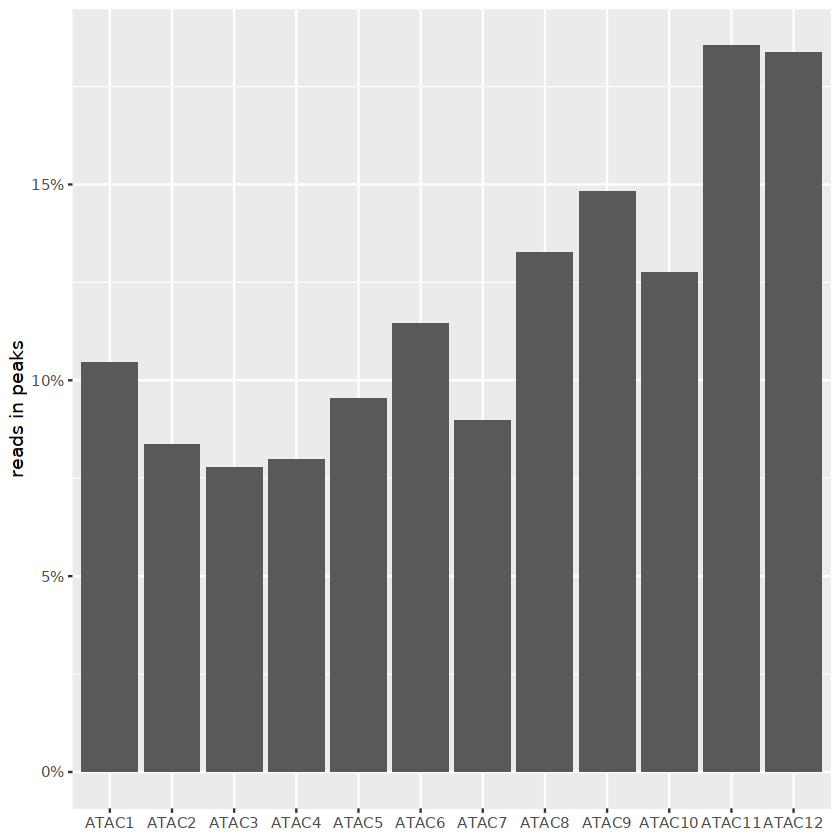

In [69]:
files = naturalsort::naturalsort(files)
names(files) = str_extract(files, "ATAC[0-9]{1,2}")

PRIPS = map_dbl(files, getPRiP)

PRIPS %>% enframe %>% 
    mutate(name = factor(name, levels = naturalsort::naturalsort(name))) %>% 
    ggplot() + geom_col(aes(name, value)) +
        labs(x = NULL, y = "reads in peaks") + 
        scale_y_continuous(labels = scales::percent_format())

## Fragment size distribution

In [3]:
bam = "../../resources/TFscreen/atac/bams_v3/ATAC10.PE.mapq.bam"

In [1]:
suppressMessages(library(ATACseqQC))

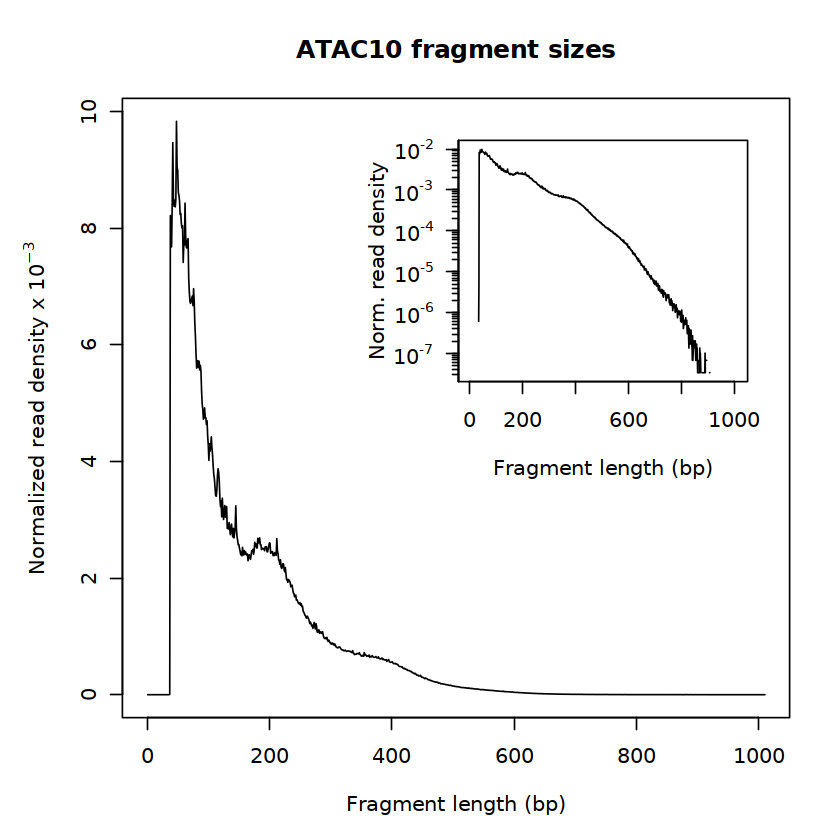

In [4]:
fragSizeDist(bam, 'ATAC10')